# Trend to thirds?

My partner and I play a lot of [Samba](https://www.pagat.com/rummy/samba.html), which is a variant of Canasta. It takes 3 decks and shuffling is tough to do with that many cards. So what I do is:

1. Cut a third of the deck by eye
2. Cut the other supposedly two thirds in half
3. Shuffle the two parts I have
4. cut those in half and shuffle one half with the remaining stack from before

I do that a bunch, and what I've been wondering is whether my much better "cut in half" by eye leads to an asymptotic "cut in thirds". So I thought I'd model it. I'll use a Poisson distribution for the randomness just because really I'm choosing and integer number of cards and I can't go below zero. Then I just rescale to be the appropriate fraction. I'll do a bad cut into thirds, then a good cut into half:

In [14]:
badCutInThirds:=RandomVariate[PoissonDistribution[52]]/52/3

-Graphics-
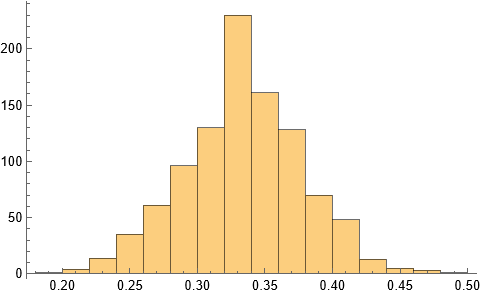

In [15]:
Histogram[Table[badCutInThirds,{1000}]]

Actually, I'm curious if this works with a poor "cut in half" as well. This is actually worse than the "cut in thirds":

-Graphics-
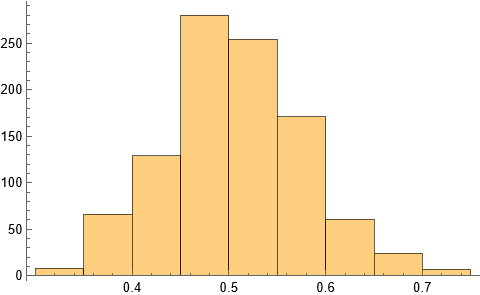

In [34]:
goodCutInHalf:=RandomVariate[PoissonDistribution[50]]/50/2;
Histogram[Table[goodCutInHalf,{1000}]]

Now I need to figure out the size of the next cut. It'll be half of the big pile from the last cut, or my best estimate of a half-cut on one minus the previous third cut:

In [37]:
next[previousSmall_]:=goodCutInHalf (1-previousSmall)
next[0.333]

0.2668

Here's doing that 100 times and showing the progression. I'm purposely starting with a really bad initial third cut of 0.9. Note that it does settle in to a decent 1/3 even with the crappy "cut in half".

-Graphics-
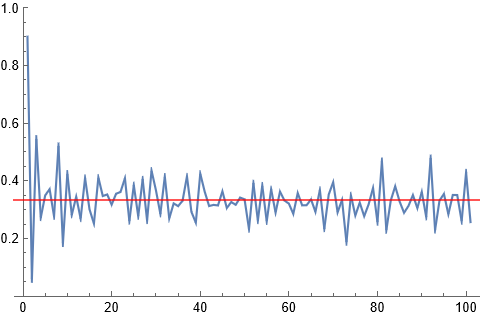

In [36]:
ListLinePlot[NestList[next,.9,100],PlotRange->{0,1},Epilog->{Red, InfiniteLine[{0,1/3},{1,0}]}]

## Your thoughts?

I'm surprised at how well this worked. What about you? Here are some starters for you:

1. This is interesting, I would have thought . . .
2. This is dumb, what you forgot was . . .
3. Why do you play Samba, why not . . .?
4. I hate that your bin choices don't line up. Surely you're not just using the defaults
5. Wait, you shuffle 100 times before dealing? That game must take a while!